In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_dataset/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [5]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [6]:
X=pd.concat([X,geography,gender],axis=1)

In [7]:
X=X.drop(["Geography","Gender"],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# ANN

In [11]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
classifier=Sequential()

In [13]:
#Adding input layer and first layer
#unit is first hidden layer where we give 6 preceptron 
#kernel_initializer is weight initial
#input_dim is the number of input layers as we have 11 feature we give 11
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu',input_dim=11))

In [14]:
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))

In [15]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [16]:
#compiling the ANN
classifier.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.35, batch_size=100, epochs=50)


Train on 5200 samples, validate on 2800 samples
Epoch 1/50
5200/5200 [==============================] - 3s 579us/step - loss: 0.5300 - accuracy: 0.7950 - val_loss: 0.4982 - val_accuracy: 0.7936
Epoch 2/50
5200/5200 [==============================] - 0s 85us/step - loss: 0.4843 - accuracy: 0.7958 - val_loss: 0.4785 - val_accuracy: 0.7921
Epoch 3/50
5200/5200 [==============================] - 0s 86us/step - loss: 0.4702 - accuracy: 0.7963 - val_loss: 0.4690 - val_accuracy: 0.7929
Epoch 4/50
5200/5200 [==============================] - 0s 77us/step - loss: 0.4619 - accuracy: 0.7971 - val_loss: 0.4637 - val_accuracy: 0.7943
Epoch 5/50
5200/5200 [==============================] - 0s 84us/step - loss: 0.4563 - accuracy: 0.7981 - val_loss: 0.4592 - val_accuracy: 0.7946
Epoch 6/50
5200/5200 [==============================] - 0s 82us/step - loss: 0.4520 - accuracy: 0.7987 - val_loss: 0.4557 - val_accuracy: 0.7946
Epoch 7/50
5200/5200 [==============================] - 0s 84us/step - loss: 0.44

In [18]:
#list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


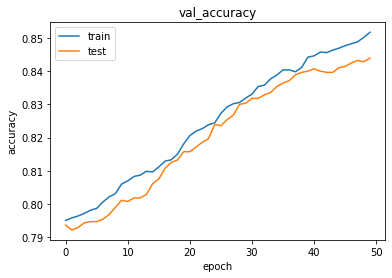

In [19]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("val_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [20]:
#Predict Test Result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.50)

In [21]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[1513,   82],
       [ 225,  180]], dtype=int64)

In [22]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
score

0.8465